170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 54ms/step - accuracy: 0.3362 - loss: 2.1329 - val_accuracy: 0.4639 - val_loss: 1.5777 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.5610 - loss: 1.2325 - val_accuracy: 0.5984 - val_loss: 1.2170 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6482 - loss: 0.9932 - val_accuracy: 0.5609 - val_loss: 1.4790 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.6921 - loss: 0.8692 - val_accuracy: 0.7408 - val_loss: 0.7620 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7215 - loss: 0.8026 - val_accuracy: 0.7602 - val_loss: 0.7062 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7453 - loss: 0.7347 - val_accuracy: 0.7507 - val_loss: 0.7496 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7639 - loss: 

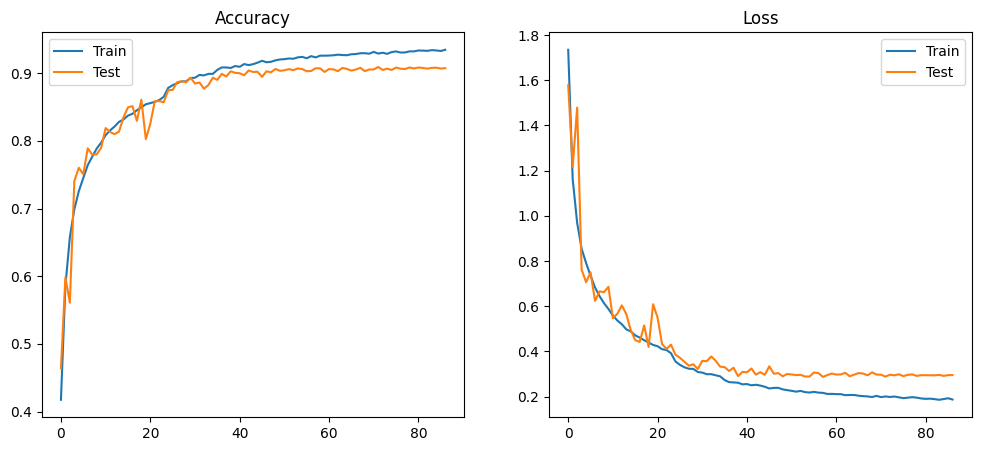

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
datagen.fit(x_train)

# Model architecture
def build_model():
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Train
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[lr_reduction, early_stop],
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[[Text(0.5, 0, '0'),
  Text(1.5, 0, '1'),
  Text(2.5, 0, '2'),
  Text(3.5, 0, '3'),
  Text(4.5, 0, '4'),
  Text(5.5, 0, '5'),
  Text(6.5, 0, '6'),
  Text(7.5, 0, '7'),
  Text(8.5, 0, '8'),
  Text(9.5, 0, '9')],
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')]]

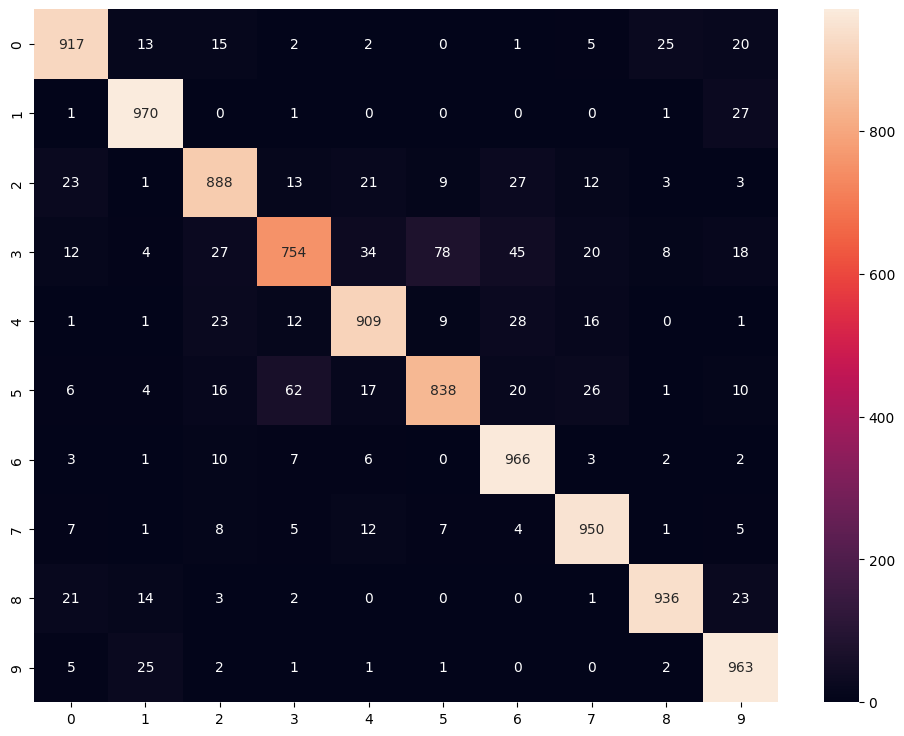

In [7]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=cifar10_labels, yticklabels=cifar10_labels)

In [100]:
import os
import json

# Create a folder to save everything
save_dir = "model_info"
os.makedirs(save_dir, exist_ok=True)

# 1. Save model architecture
with open(os.path.join(save_dir, "model_architecture.txt"), "w") as f:
    f.write(model.to_json())

# 2. Save model weights
model.save_weights(os.path.join(save_dir, "model_weights.weights.h5"))

# 3. Save training configuration
training_config = {
    "optimizer": "adam",
    "loss": "categorical_crossentropy",
    "metrics": ["accuracy"]
}
with open(os.path.join(save_dir, "training_config.json"), "w") as f:
    json.dump(training_config, f, indent=4)

# 4. Save training history
with open(os.path.join(save_dir, "training_history.json"), "w") as f:
    json.dump(history.history, f, indent=4)

# 5. Save class labels (CIFAR-10)
cifar10_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}
with open(os.path.join(save_dir, "class_labels.json"), "w") as f:
    json.dump(cifar10_labels, f, indent=4)

# 6. Save evaluation results
with open(os.path.join(save_dir, "evaluation_results.txt"), "w") as f:
    f.write(f"Test Loss: {test_loss}\n")
    f.write(f"Test Accuracy: {test_acc * 100:.2f}%\n")

print(f"All files saved in folder: {save_dir}")


All files saved in folder: model_info


In [4]:
import shutil

# Create a zip file from the folder
shutil.make_archive("model_info", 'zip', "model_info")

'/content/model_info.zip'

In [5]:
from google.colab import files
files.download("model_info.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
import os
import numpy as np
import json
import random
from tensorflow.keras.models import model_from_json
from tensorflow.keras.datasets import cifar10

# Load model architecture
with open("model_info/model_architecture.txt", "r") as f:
    model_json = f.read()

model = model_from_json(model_json)

# Load weights
model.load_weights("model_info/model_weights.weights.h5")

# Compile (you can match with training config)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Load CIFAR-10 data
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype("float32") / 255.0

# Load label mapping
with open("model_info/class_labels.json", "r") as f:
    label_map = json.load(f)

# Pick 10 random indices
indices = random.sample(range(len(x_test)), 10)

correct = 0
for idx in indices:
    img = np.expand_dims(x_test[idx], axis=0)  # shape (1, 32, 32, 3)
    pred_probs = model.predict(img, verbose=0)[0]
    pred_class = int(np.argmax(pred_probs))
    true_class = int(y_test[idx][0])

    pred_label = label_map[str(pred_class)]
    true_label = label_map[str(true_class)]

    is_correct = pred_class == true_class
    if is_correct:
        correct += 1

    print(f"Image {idx}: Predicted = {pred_class} ({pred_label}), Actual = {true_class} ({true_label})")

print(f"\n✅ Correct predictions: {correct}/10")

Image 2762: Predicted = 4 (deer), Actual = 4 (deer)
Image 3274: Predicted = 1 (automobile), Actual = 1 (automobile)
Image 2605: Predicted = 4 (deer), Actual = 4 (deer)
Image 9448: Predicted = 3 (cat), Actual = 3 (cat)
Image 9624: Predicted = 2 (bird), Actual = 2 (bird)
Image 3899: Predicted = 6 (frog), Actual = 6 (frog)
Image 7090: Predicted = 2 (bird), Actual = 2 (bird)
Image 1661: Predicted = 2 (bird), Actual = 6 (frog)
Image 3696: Predicted = 4 (deer), Actual = 4 (deer)
Image 3672: Predicted = 0 (airplane), Actual = 0 (airplane)

✅ Correct predictions: 9/10
